In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv("cardio_train.csv",delimiter=";")
data.drop(['id'], axis = 1, inplace = True)

In [4]:
from sklearn import preprocessing as ps
trainData = data.iloc[0:52500]
testData = data.iloc[52500:]

In [5]:
print(trainData, testData)

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
52495  16200       1     167    65.0    150     90            2     1      0   
52496  15216       2     169    73.0    110     60            1     2      1   
52497  21706       1     152    82.0    130     80            2     1      0   
52498  18249       1     160    60.0    120     80            1     1      0   
52499  15957       1     168    69.0    100     60            1     1      0   

       alco  active  cardio  
0        

In [6]:
trainData = trainData.values
testData = testData.values
x_train = trainData[:, 0:11]
y_train = trainData[:, 11]
x_test = testData[:, 0:11]
y_test = testData[:, 11]

In [10]:
x_test.shape

(17500, 11)

In [12]:
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [13]:
clf.score(x_test, y_test)

0.6844

In [14]:
x_axis = []
y_axis = []
for i in range(1, 26, 2):
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf, x_train, y_train)
    x_axis.append(i)
    y_axis.append(score.mean())

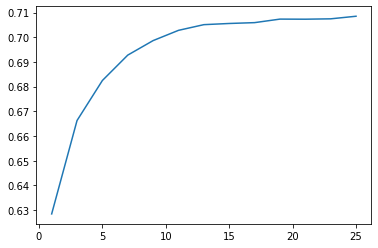

In [15]:
import matplotlib.pyplot as plt
plt.plot(x_axis, y_axis)
plt.show()